In [1]:
import os
HOCKEY_PATH = os.path.join("datasets", "hockey")

In [2]:
import pandas as pd

def load_hockey_data(hockey_path=HOCKEY_PATH):
    csv_path = os.path.join(hockey_path, "hockey.csv")
    return pd.read_csv(csv_path)

In [3]:
hockey = load_hockey_data()
hockey.head()

,Hosts,Guests,1PHosts,2PHosts,3PHosts,OTHosts,SSHosts,1PGuests,2PGuests,3PGuests,OTGuests,SSGuests,CountHosts,CountGuests
0,Торонто,Монреаль,1,1,0,1,0,1,1,0,0,0,3,2
1,Вашингтон,Бостон,2,4,1,0,0,0,0,0,0,0,7,0
2,Ванкувер,Калгари,1,0,4,0,0,0,0,2,0,0,5,2
3,Сан-Хосе,Анахайм,1,1,0,0,0,1,1,3,0,0,2,5
4,Баффало,Бостон,0,0,0,0,0,2,1,1,0,0,0,4


In [4]:
hockey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 656 entries, 0 to 655
Data columns (total 14 columns):
Hosts          656 non-null object
Guests         656 non-null object
1PHosts        656 non-null int64
2PHosts        656 non-null int64
3PHosts        656 non-null int64
OTHosts        656 non-null int64
SSHosts        656 non-null int64
1PGuests       656 non-null int64
2PGuests       656 non-null int64
3PGuests       656 non-null int64
OTGuests       656 non-null int64
SSGuests       656 non-null int64
CountHosts     656 non-null int64
CountGuests    656 non-null int64
dtypes: int64(12), object(2)
memory usage: 71.8+ KB


In [5]:
hockey.describe()

,1PHosts,2PHosts,3PHosts,OTHosts,SSHosts,1PGuests,2PGuests,3PGuests,OTGuests,SSGuests,CountHosts,CountGuests
count,656.000000,656.000000,656.000000,656.000000,656.000000,656.000000,656.000000,656.000000,656.000000,656.000000,656.000000,656.00000
mean,0.967988,1.079268,1.065549,0.070122,0.022866,0.812500,0.998476,0.948171,0.092988,0.036585,3.205793,2.88872
std,0.960540,1.017314,1.103901,0.255547,0.149590,0.863101,0.986163,0.955688,0.290637,0.187885,1.771366,1.72935
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,2.00000
50%,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,3.000000,3.00000
75%,1.000000,2.000000,2.000000,0.000000,0.000000,1.000000,2.000000,2.000000,0.000000,0.000000,4.000000,4.00000
max,5.000000,5.000000,5.000000,1.000000,1.000000,4.000000,5.000000,4.000000,1.000000,1.000000,9.000000,9.00000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000000051F72B0>,
      dtype=object)

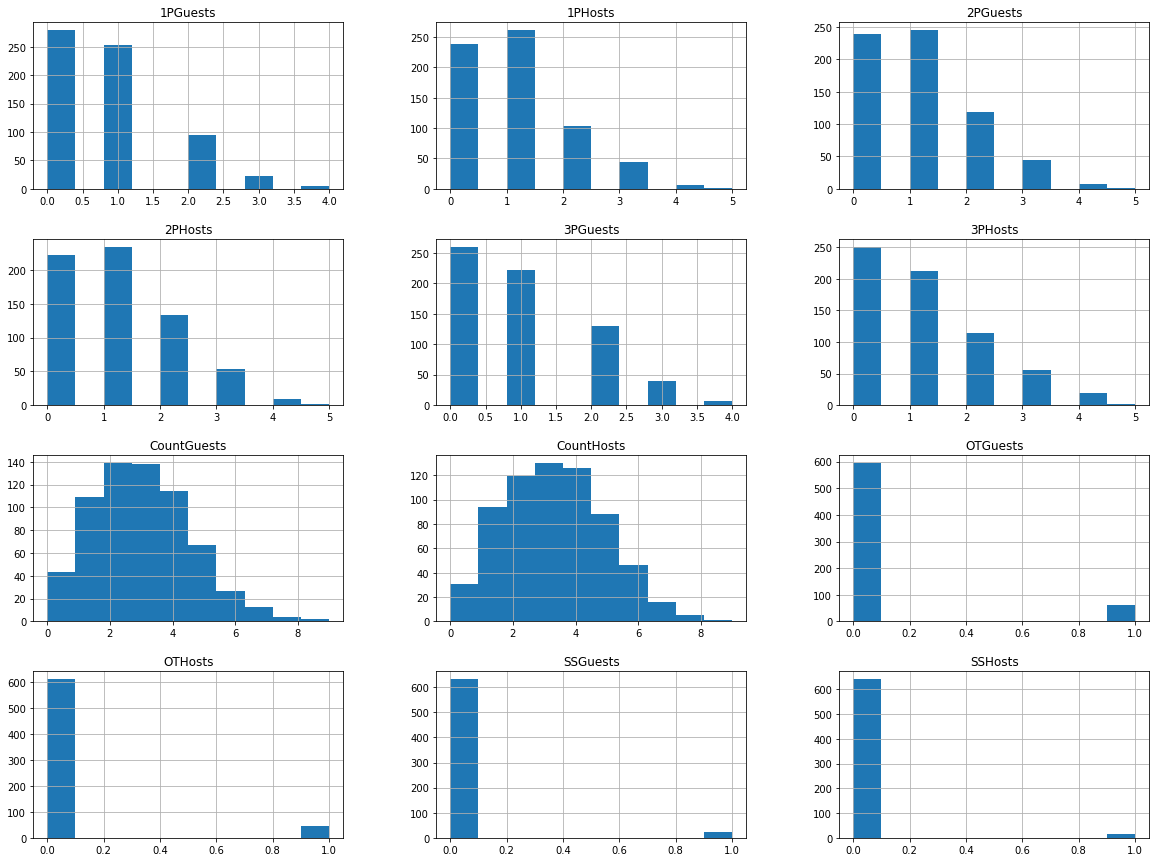

In [7]:
hockey.hist(figsize=(20,15))

In [9]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(hockey, test_size=0.2, random_state=42)

In [10]:
test_set.head()

,Хозяева,Гости,1PHosts,2PHosts,3PHosts,OTHosts,SSHosts,1PGuests,2PGuests,3PGuests,OTGuests,SSGuests
192,Ванкувер,Колорадо,1,3,2,1,0,0,4,2,0,0
265,Нью-Джерси,Питтсбург,1,1,2,0,0,1,0,1,0,0
101,Филадельфия,Нью-Джерси,1,1,3,0,0,1,0,1,0,0
625,Айлендерс,Чикаго,1,1,0,1,0,1,0,1,0,0
523,Аризона,Айлендерс,1,0,0,0,0,1,2,0,0,0


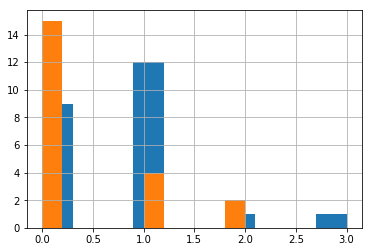

In [19]:
hockey["1PHosts"].where(hockey["Хозяева"] == "Лос-Анджелес").hist()
hockey["1PGuests"].where(hockey["Гости"] == "Лос-Анджелес").hist()

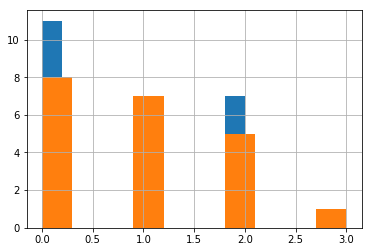

In [21]:
hockey["2PHosts"].where(hockey["Хозяева"] == "Лос-Анджелес").hist()
hockey["2PGuests"].where(hockey["Гости"] == "Лос-Анджелес").hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000000019744B38>,
      dtype=object)

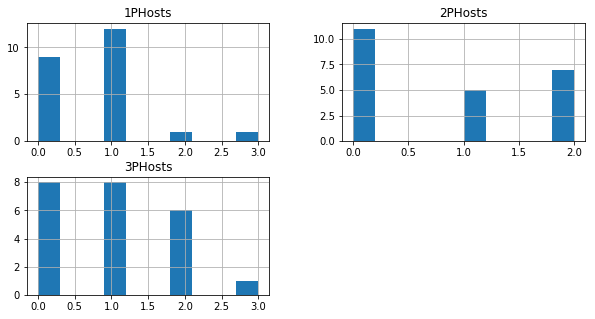

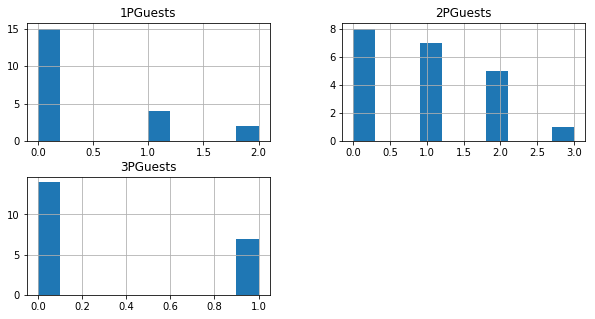

In [36]:
hockey[["1PHosts","2PHosts","3PHosts"]].where(hockey["Хозяева"] == "Лос-Анджелес").hist(figsize=(10,5))
hockey[["1PGuests","2PGuests","3PGuests"]].where(hockey["Гости"] == "Лос-Анджелес").hist(figsize=(10,5))

In [33]:
hockey["1PHosts"].where(hockey["Хозяева"] == "Лос-Анджелес").value_counts()

1.0    12
0.0     9
3.0     1
2.0     1
Name: 1PHosts, dtype: int64

In [37]:
hockey["2PHosts"].where(hockey["Хозяева"] == "Лос-Анджелес").value_counts()

0.0    11
2.0     7
1.0     5
Name: 2PHosts, dtype: int64

In [38]:
hockey["3PHosts"].where(hockey["Хозяева"] == "Лос-Анджелес").value_counts()

1.0    8
0.0    8
2.0    6
3.0    1
Name: 3PHosts, dtype: int64

In [39]:
hockey["1PGuests"].where(hockey["Гости"] == "Лос-Анджелес").value_counts()

0.0    15
1.0     4
2.0     2
Name: 1PGuests, dtype: int64

In [40]:
hockey["2PGuests"].where(hockey["Гости"] == "Лос-Анджелес").value_counts()

0.0    8
1.0    7
2.0    5
3.0    1
Name: 2PGuests, dtype: int64

In [41]:
hockey["3PGuests"].where(hockey["Гости"] == "Лос-Анджелес").value_counts()

0.0    14
1.0     7
Name: 3PGuests, dtype: int64

In [42]:
hockey = hockey.rename(columns={'Гости': 'Guests', 'Хозяева': 'Hosts'})

In [43]:
hockey.to_csv(os.path.join("datasets", "hockey", "hockey.csv"), sep=',', encoding='utf-8', index=False)

In [44]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(hockey, test_size=0.2, random_state=42)

In [45]:
test_set.head()

,Hosts,Guests,1PHosts,2PHosts,3PHosts,OTHosts,SSHosts,1PGuests,2PGuests,3PGuests,OTGuests,SSGuests
192,Ванкувер,Колорадо,1,3,2,1,0,0,4,2,0,0
265,Нью-Джерси,Питтсбург,1,1,2,0,0,1,0,1,0,0
101,Филадельфия,Нью-Джерси,1,1,3,0,0,1,0,1,0,0
625,Айлендерс,Чикаго,1,1,0,1,0,1,0,1,0,0
523,Аризона,Айлендерс,1,0,0,0,0,1,2,0,0,0


In [47]:
hockey = train_set.copy()

In [51]:
corr_matrix = hockey[["1PHosts","2PHosts","3PHosts","OTHosts","SSHosts"]].where(hockey["Hosts"] == "Лос-Анджелес").corr()

In [54]:
hockey = load_hockey_data()
hockey.head()

,Hosts,Guests,1PHosts,2PHosts,3PHosts,OTHosts,SSHosts,1PGuests,2PGuests,3PGuests,OTGuests,SSGuests
0,Торонто,Монреаль,1,1,0,1,0,1,1,0,0,0
1,Вашингтон,Бостон,2,4,1,0,0,0,0,0,0,0
2,Ванкувер,Калгари,1,0,4,0,0,0,0,2,0,0
3,Сан-Хосе,Анахайм,1,1,0,0,0,1,1,3,0,0
4,Баффало,Бостон,0,0,0,0,0,2,1,1,0,0


In [8]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(hockey, hockey["Hosts"]):
    strat_train_set = hockey.loc[train_index]
    strat_test_set = hockey.loc[test_index]

In [9]:
hockey = strat_train_set.copy()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000000014DAC710>,
      dtype=object)

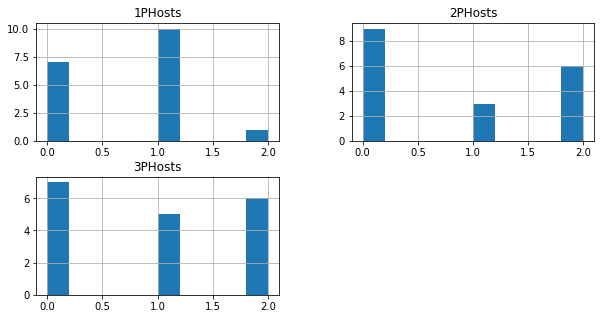

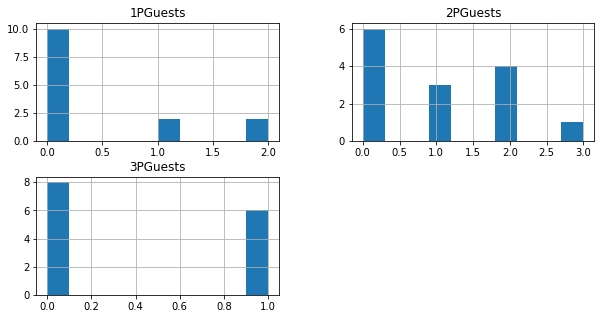

In [10]:
hockey[["1PHosts","2PHosts","3PHosts"]].where(hockey["Hosts"] == "Лос-Анджелес").hist(figsize=(10,5))
hockey[["1PGuests","2PGuests","3PGuests"]].where(hockey["Guests"] == "Лос-Анджелес").hist(figsize=(10,5))

In [11]:
hockey["1PHosts"].where(hockey["Hosts"] == "Лос-Анджелес").value_counts()

1.0    10
0.0     7
2.0     1
Name: 1PHosts, dtype: int64

In [12]:
hockey["2PHosts"].where(hockey["Hosts"] == "Лос-Анджелес").value_counts()

0.0    9
2.0    6
1.0    3
Name: 2PHosts, dtype: int64

In [13]:
hockey["1PHosts"].where(hockey["Hosts"] == "Лос-Анджелес").value_counts()

1.0    10
0.0     7
2.0     1
Name: 1PHosts, dtype: int64

In [14]:
corr_matrix = hockey[["1PHosts","2PHosts","3PHosts","OTHosts","SSHosts"]].where(hockey["Hosts"] == "Лос-Анджелес").corr()

In [15]:
corr_matrix["1PHosts"].sort_values(ascending=False)

1PHosts    1.000000e+00
2PHosts   -2.975710e-18
3PHosts   -1.512939e-01
OTHosts             NaN
SSHosts             NaN
Name: 1PHosts, dtype: float64

In [68]:
hockey["CountHosts"] = hockey["1PHosts"] + hockey["2PHosts"] + hockey["3PHosts"] + hockey["OTHosts"] + hockey["SSHosts"] 

In [69]:
hockey["CountGuests"] = hockey["1PGuests"] + hockey["2PGuests"] + hockey["3PGuests"] + hockey["OTGuests"] + hockey["SSGuests"] 

In [71]:
hockey.to_csv(os.path.join("datasets", "hockey", "hockey.csv"), sep=',', encoding='utf-8', index=False)

c:\users\katirkin\appdata\local\programs\python\python36\lib\site-packages\pandas\plotting\_misc.py:108: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=0.0, right=0.0
  ax.set_xlim(boundaries_list[j])
c:\users\katirkin\appdata\local\programs\python\python36\lib\site-packages\pandas\plotting\_misc.py:109: UserWarning: Attempting to set identical bottom==top results
in singular transformations; automatically expanding.
bottom=0.0, top=0.0
  ax.set_ylim(boundaries_list[i])
c:\users\katirkin\appdata\local\programs\python\python36\lib\site-packages\pandas\plotting\_misc.py:100: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=0.0, right=0.0
  ax.set_xlim(boundaries_list[i])


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000001F11FEF0>,
      dtype=object)

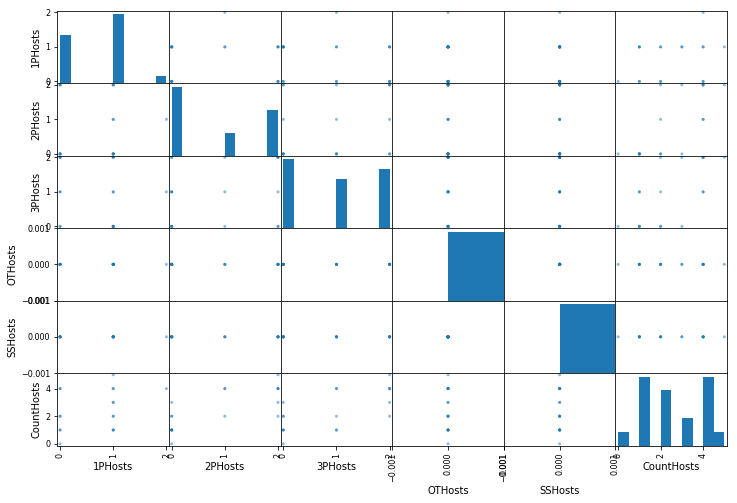

In [81]:
from pandas.plotting import scatter_matrix

attributes = ["1PHosts","2PHosts","3PHosts","OTHosts","SSHosts","CountHosts"]
scatter_matrix(hockey[["1PHosts","2PHosts","3PHosts","OTHosts","SSHosts","CountHosts"]].where(hockey["Hosts"] == "Лос-Анджелес"), figsize=(12, 8))

In [18]:
 corr_matrix = hockey[["1PHosts","2PHosts","3PHosts","OTHosts","SSHosts","CountHosts"]].corr()

In [19]:
corr_matrix["CountHosts"].sort_values(ascending=False)

CountHosts    1.000000
3PHosts       0.613941
2PHosts       0.565980
1PHosts       0.522487
OTHosts       0.077646
SSHosts       0.020032
Name: CountHosts, dtype: float64

In [22]:
corr_matrix = hockey[["1PHosts","2PHosts","3PHosts"]].corr()

In [23]:
corr_matrix["3PHosts"].sort_values(ascending=False)

3PHosts    1.000000
2PHosts    0.014695
1PHosts    0.005746
Name: 3PHosts, dtype: float64

In [24]:
 hockey.value_counts()

AttributeError: 'DataFrame' object has no attribute 'value_counts'

In [25]:
hockey["Hosts"].value_counts()

Детройт         19
Сент-Луис       19
Оттава          19
Анахайм         18
Аризона         18
Каролина        18
Лос-Анджелес    18
Питтсбург       18
Сан-Хосе        18
Чикаго          18
Виннипег        18
Рейнджерс       17
Торонто         17
Монреаль        17
Баффало         17
Коламбус        17
Тампа-Бэй       17
Даллас          17
Нэшвилл         17
Филадельфия     16
Вегас           16
Бостон          16
Миннесота       16
Колорадо        16
Эдмонтон        16
Вашингтон       16
Калгари         16
Флорида         15
Ванкувер        15
Нью-Джерси      15
Айлендерс       14
Name: Hosts, dtype: int64

In [26]:
hockey["Guests"].value_counts()

Ванкувер        22
Колорадо        21
Чикаго          20
Даллас          20
Калгари         20
Вегас           20
Филадельфия     19
Бостон          19
Анахайм         19
Питтсбург       19
Детройт         18
Монреаль        18
Нэшвилл         18
Аризона         18
Айлендерс       18
Флорида         18
Баффало         17
Эдмонтон        17
Сан-Хосе        17
Миннесота       16
Рейнджерс       16
Вашингтон       15
Сент-Луис       15
Коламбус        15
Лос-Анджелес    14
Нью-Джерси      14
Каролина        13
Торонто         13
Оттава          13
Виннипег        12
Тампа-Бэй       10
Name: Guests, dtype: int64

In [27]:
hockey = pd.get_dummies(hockey)

In [28]:
hockey.head()

,1PHosts,2PHosts,3PHosts,OTHosts,SSHosts,1PGuests,2PGuests,3PGuests,OTGuests,SSGuests,...,Guests_Питтсбург,Guests_Рейнджерс,Guests_Сан-Хосе,Guests_Сент-Луис,Guests_Тампа-Бэй,Guests_Торонто,Guests_Филадельфия,Guests_Флорида,Guests_Чикаго,Guests_Эдмонтон
635,1,1,1,0,0,0,3,1,0,0,...,0,0,0,0,0,0,0,0,0,0
539,0,1,3,0,0,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
514,0,0,0,0,0,1,1,2,0,0,...,0,0,0,0,0,0,0,0,0,0
37,2,0,3,0,0,0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
40,1,2,1,0,0,2,3,2,0,0,...,0,0,0,0,0,1,0,0,0,0


In [36]:
hockey = load_hockey_data()
hockey.head()

,Hosts,Guests,1PHosts,2PHosts,3PHosts,OTHosts,SSHosts,1PGuests,2PGuests,3PGuests,OTGuests,SSGuests,CountHosts,CountGuests
0,Торонто,Монреаль,1,1,0,1,0,1,1,0,0,0,3,2
1,Вашингтон,Бостон,2,4,1,0,0,0,0,0,0,0,7,0
2,Ванкувер,Калгари,1,0,4,0,0,0,0,2,0,0,5,2
3,Сан-Хосе,Анахайм,1,1,0,0,0,1,1,3,0,0,2,5
4,Баффало,Бостон,0,0,0,0,0,2,1,1,0,0,0,4


In [30]:
hockey = pd.get_dummies(hockey)

In [37]:
hockey.head()

,Hosts,Guests,1PHosts,2PHosts,3PHosts,OTHosts,SSHosts,1PGuests,2PGuests,3PGuests,OTGuests,SSGuests,CountHosts,CountGuests
0,Торонто,Монреаль,1,1,0,1,0,1,1,0,0,0,3,2
1,Вашингтон,Бостон,2,4,1,0,0,0,0,0,0,0,7,0
2,Ванкувер,Калгари,1,0,4,0,0,0,0,2,0,0,5,2
3,Сан-Хосе,Анахайм,1,1,0,0,0,1,1,3,0,0,2,5
4,Баффало,Бостон,0,0,0,0,0,2,1,1,0,0,0,4


In [38]:
hockey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 656 entries, 0 to 655
Data columns (total 14 columns):
Hosts          656 non-null object
Guests         656 non-null object
1PHosts        656 non-null int64
2PHosts        656 non-null int64
3PHosts        656 non-null int64
OTHosts        656 non-null int64
SSHosts        656 non-null int64
1PGuests       656 non-null int64
2PGuests       656 non-null int64
3PGuests       656 non-null int64
OTGuests       656 non-null int64
SSGuests       656 non-null int64
CountHosts     656 non-null int64
CountGuests    656 non-null int64
dtypes: int64(12), object(2)
memory usage: 71.8+ KB


In [39]:
hockey["2PHosts"].where(hockey["Hosts"] == "Оттава").value_counts()

1.0    10
0.0     6
2.0     5
3.0     2
4.0     1
Name: 2PHosts, dtype: int64

In [40]:
hockey["1PHosts"].where(hockey["Hosts"] == "Оттава").value_counts()

1.0    9
0.0    8
3.0    4
2.0    3
Name: 1PHosts, dtype: int64

In [41]:
hockey["3PHosts"].where(hockey["Hosts"] == "Оттава").value_counts()

0.0    11
1.0     7
2.0     4
3.0     2
Name: 3PHosts, dtype: int64

In [42]:
hockey["2PGuests"].where(hockey["Guests"] == "Колорадо").value_counts()

0.0    7
1.0    6
2.0    6
4.0    2
3.0    1
Name: 2PGuests, dtype: int64

In [43]:
hockey["1PGuests"].where(hockey["Guests"] == "Колорадо").value_counts()

0.0    9
1.0    8
2.0    3
3.0    2
Name: 1PGuests, dtype: int64

In [44]:
hockey["3PGuests"].where(hockey["Guests"] == "Колорадо").value_counts()

1.0    7
0.0    6
2.0    5
3.0    4
Name: 3PGuests, dtype: int64

In [45]:
hockey["CountGuests"].where(hockey["Guests"] == "Колорадо").value_counts()

2.0    5
4.0    4
3.0    4
5.0    4
1.0    2
6.0    2
7.0    1
Name: CountGuests, dtype: int64

In [47]:
hockey["CountHosts"].where(hockey["Hosts"] == "Оттава").value_counts()

4.0    6
3.0    6
2.0    4
6.0    2
1.0    2
5.0    2
0.0    1
7.0    1
Name: CountHosts, dtype: int64